# Pendekatan Machine Learning dengan Model Random Forest untuk Klasifikasi Obesitas Berdasarkan Faktor Risiko Dan Gaya Hidup

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
import joblib

In [54]:
data = pd.read_csv('/content/ObesityDataSet.csv')

In [55]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [57]:
for col in data.columns:
    print(f"Column '{col}': {data[col].nunique()} unique values")

Column 'Gender': 2 unique values
Column 'Age': 1402 unique values
Column 'Height': 1574 unique values
Column 'Weight': 1525 unique values
Column 'family_history_with_overweight': 2 unique values
Column 'FAVC': 2 unique values
Column 'FCVC': 810 unique values
Column 'NCP': 635 unique values
Column 'CAEC': 4 unique values
Column 'SMOKE': 2 unique values
Column 'CH2O': 1268 unique values
Column 'SCC': 2 unique values
Column 'FAF': 1190 unique values
Column 'TUE': 1129 unique values
Column 'CALC': 4 unique values
Column 'MTRANS': 5 unique values
Column 'NObeyesdad': 7 unique values


In [58]:
data.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [59]:
source = "Dataset diambil dari Kaggle. berikut untuk tautan dari datasetnya."
print(f"Source: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels")


Source: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels


## 1. Data Preprocessing

In [60]:
# Bulatkan nilai pada kolom "Age" ke bawah
data['Age'] = data['Age'].astype(int)
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [61]:
# Encode categorical features
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

print(data.head())

   Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0   21    1.62    64.0                               1     0   2.0   
1       0   21    1.52    56.0                               1     0   3.0   
2       1   23    1.80    77.0                               1     0   2.0   
3       1   27    1.80    87.0                               0     0   3.0   
4       1   22    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  


In [62]:
# menstandarisasi fitur numerik
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [63]:
# Kecualikan kolom target jika dalam numerical_cols
if 'NObeyesdad' in numerical_cols:
    numerical_cols = numerical_cols.drop('NObeyesdad')

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.011914,-0.471293,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,1.419172,0.503337,1
1,-1.011914,-0.471293,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,-0.521160,0.503337,1
2,0.988227,-0.154194,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,-2.461491,0.503337,1
3,0.988227,0.480005,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,-2.461491,1.296280,5
4,0.988227,-0.312743,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,-0.521160,0.503337,6


In [64]:
# Handle missing values
data.fillna(data.mean(), inplace=True)

data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.011914,-0.471293,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,1.419172,0.503337,1
1,-1.011914,-0.471293,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,-0.521160,0.503337,1
2,0.988227,-0.154194,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,-2.461491,0.503337,1
3,0.988227,0.480005,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,-2.461491,1.296280,5
4,0.988227,-0.312743,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,-0.521160,0.503337,6


## 2. Exploratory Data Analysis (EDA)

In [65]:
categorical_features = data.select_dtypes(include=['int64', 'object']).columns


--- Distribusi untuk NObeyesdad ---
            Jumlah Sampel  Persentase
NObeyesdad                           
2                     351        16.6
4                     324        15.3
3                     297        14.1
5                     290        13.7
6                     290        13.7
1                     287        13.6
0                     272        12.9


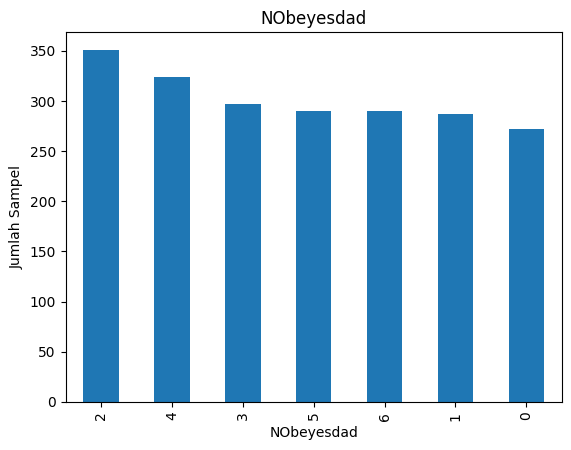

In [66]:
for feature in categorical_features:
    count = data[feature].value_counts()
    percent = 100 * data[feature].value_counts(normalize=True)
    dfu = pd.DataFrame({'Jumlah Sampel': count, 'Persentase': percent.round(1)})
    print(f"\n--- Distribusi untuk {feature} ---")
    print(dfu)
    count.plot(kind='bar', title=feature)
    plt.xlabel(feature)
    plt.ylabel('Jumlah Sampel')
    plt.show()

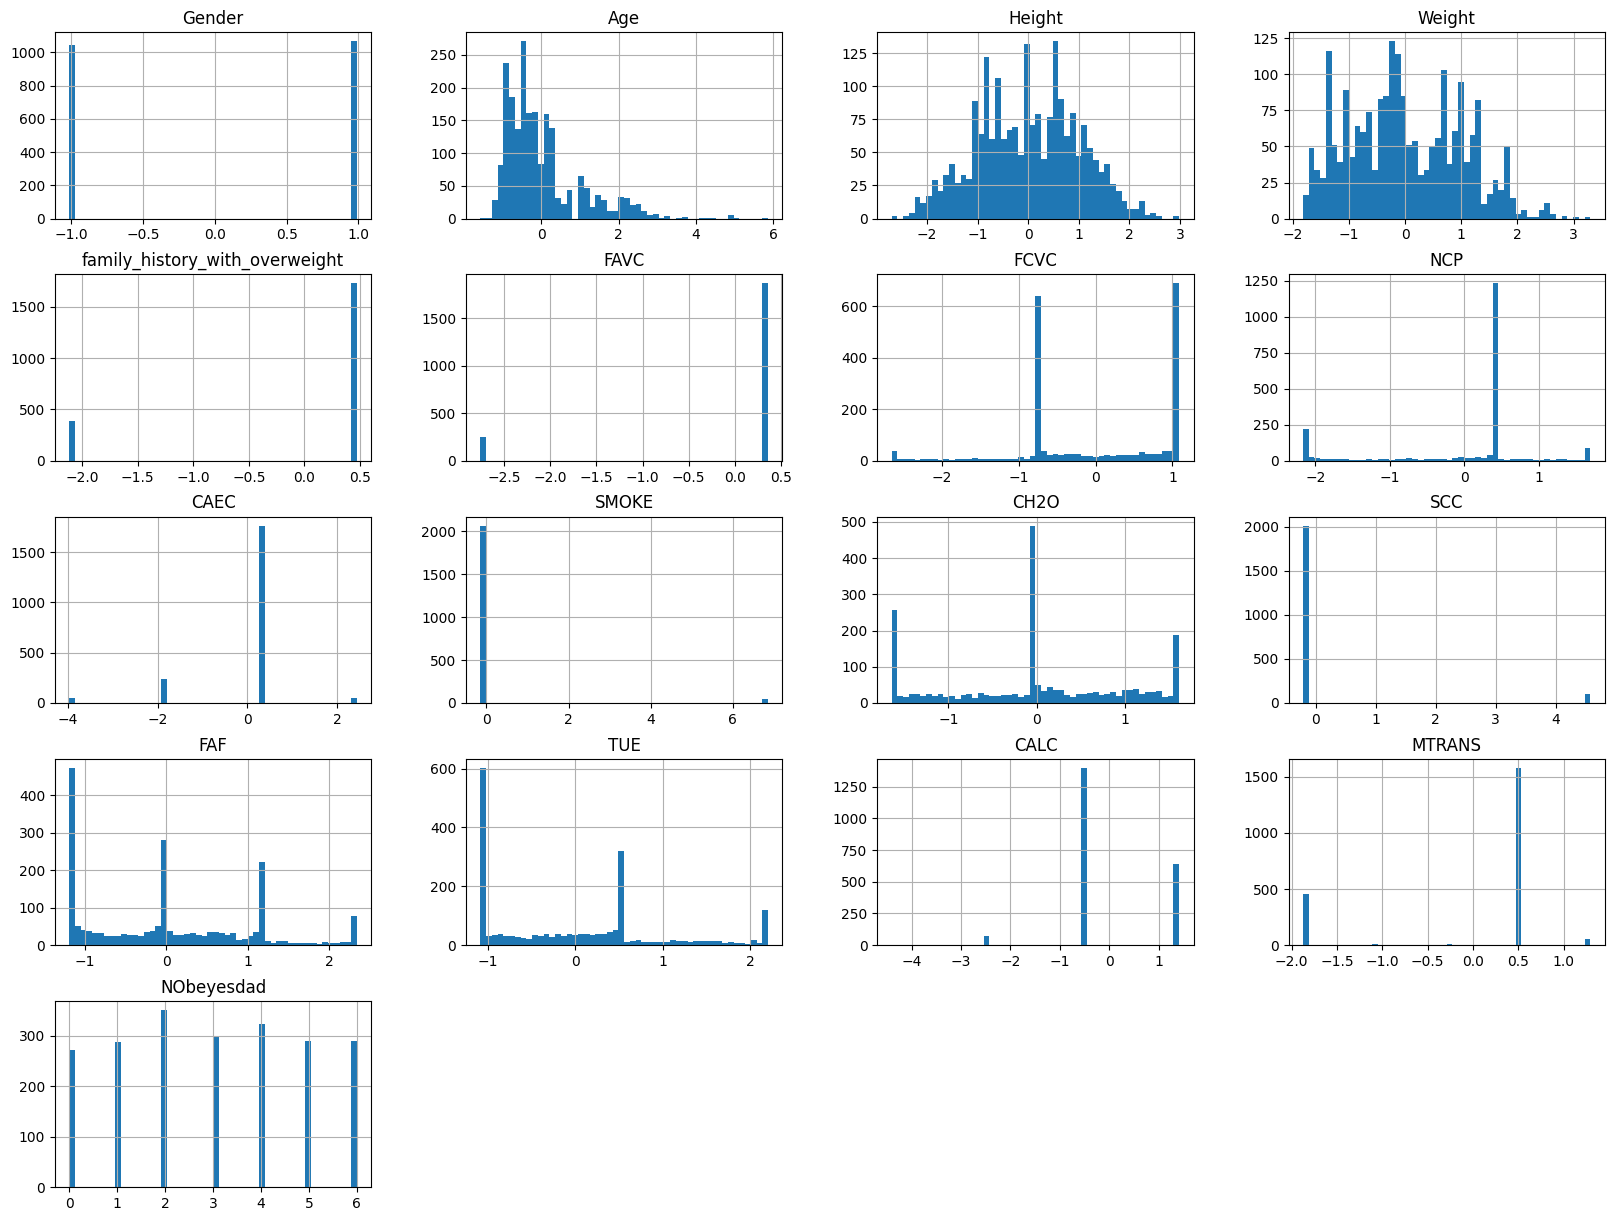

In [67]:
data.hist(bins=50, figsize=(20,15))
plt.show()

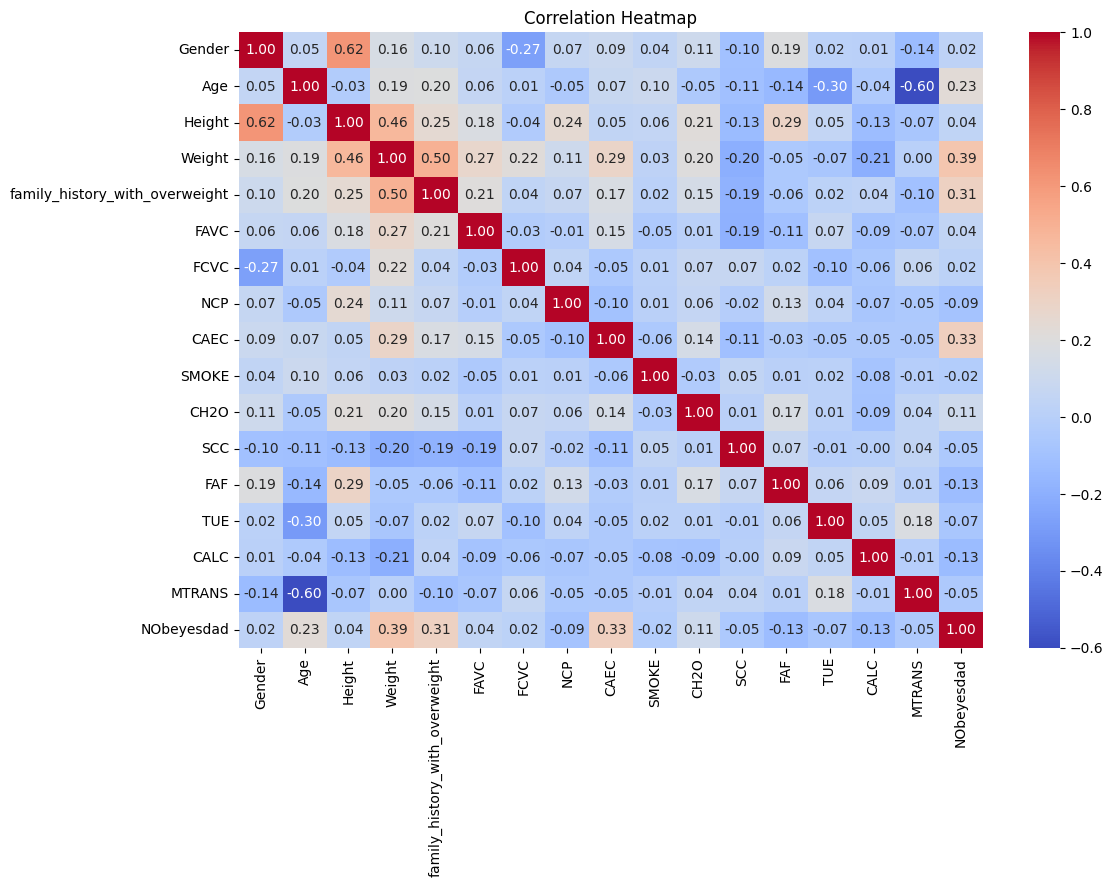

In [68]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 3. Feature Selection

In [69]:
# memilih fitur terbaik dari dataset menggunakan metode SelectKBest
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]

print("\n--- Selected Features ---")
print(selected_features)



--- Selected Features ---
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'CAEC', 'CALC', 'MTRANS'],
      dtype='object')


In [70]:
# Update dataset with selected features
X = X[selected_features]

## 4. Modeling

In [71]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
# Build Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
# Save the model
joblib.dump(model, "random_forest_model.pkl")
print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl


## 5. Evaluasi Model

In [44]:
# Predictions
y_pred = model.predict(X_test)

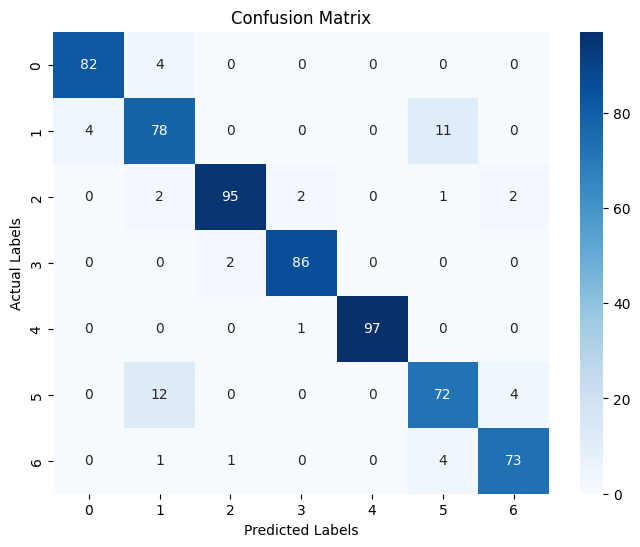

In [46]:
# Confusion Matrix
RF_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(RF_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [48]:
#classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        86
           1       0.80      0.84      0.82        93
           2       0.97      0.93      0.95       102
           3       0.97      0.98      0.97        88
           4       1.00      0.99      0.99        98
           5       0.82      0.82      0.82        88
           6       0.92      0.92      0.92        79

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



In [50]:
# Hasil akurasi model
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 91.96%
